In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
import matplotlib as plt
from sklearn.preprocessing import StandardScaler


In [322]:
df = pd.read_csv("Data.csv")

In [323]:
df.shape

(1386, 31)

In [324]:
df.columns

Index(['Report Year', 'Model Year', 'Mileage', 'Street', 'Parking Lot',
       'Highway / Freeway', 'Intersection', 'Roadway(0 is dry) Surface',
       'Posted Speed Limit (MPH)',
       'Daylight(Daylight3, Dawn'dusk2, dark-light1, dark-not light+J8270)',
       'Weather - Clear', 'Weather - Snow', 'Weather - Cloud1',
       'Weather - Fog/Smoke', 'Weather - Rain', 'Weather - Severe Wind',
       'Weather - Unknown', 'Weather - Thunder', 'Passenger Car',
       'Non-Motorist: Cyclist', 'Heavy Truck', 'SUV', 'Animal', 'Van',
       'Pickup Truck', 'No Injuries Reported', 'Minor', 'Moderate', 'Serious',
       'Property Damage?', 'Severity'],
      dtype='object')

In [325]:
df["Severity"].value_counts()

Severity
1    1127
2     128
0      74
3      40
4      17
Name: count, dtype: int64

In [326]:
df = df[df['Severity'] != 0]

In [327]:
df.shape

(1312, 31)

In [328]:
import pandas as pd

# Assuming df is your DataFrame
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")  # Adds a blank line between outputs for readability

Value counts for Report Year:
Report Year
0       574
2023    286
2024    195
2022    177
2021     80
Name: count, dtype: int64


Value counts for Model Year:
Model Year
2021    539
2023    254
2024    139
2020    128
2022    108
2017     47
2019     43
2016     37
0         9
2018      8
Name: count, dtype: int64


Value counts for Mileage:
Mileage
0          27
5091        8
1111        6
19560       6
2798        6
           ..
101912      1
22303       1
1150344     1
1119636     1
6330        1
Name: count, Length: 740, dtype: int64


Value counts for Street:
Street
0    739
1    573
Name: count, dtype: int64


Value counts for Parking Lot:
Parking Lot
0    1241
1      71
Name: count, dtype: int64


Value counts for Highway / Freeway:
Highway / Freeway
0    1209
1     103
Name: count, dtype: int64


Value counts for Intersection:
Intersection
0    753
1    559
Name: count, dtype: int64


Value counts for Roadway(0 is dry) Surface:
Roadway(0 is dry) Surface
0    1246
1      66
Nam

In [329]:
df = df[df['Posted Speed Limit (MPH)'] != 1]
df = df[df['Posted Speed Limit (MPH)'] != 0]

In [330]:
import pandas as pd

# Assuming df is your DataFrame
for column in df.columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("\n")  # Adds a blank line between outputs for readability


Unique values for Report Year:
[   0 2024 2023 2022 2021]


Unique values for Model Year:
[2024 2021 2023 2017 2019 2022 2020    0 2016 2018]


Unique values for Mileage:
[   6527   83212    2573  137012   22225  104293   23613   34092   24657
    2841   98868   51747    2154    9736    8966   14832   14358  107895
  151685   90797   37010   22183    2972   28632   69410   28037    3738
  169580  111454   22069   92528    7815   16788      69   44998   58078
   76583     531    6205   14604    6495   18249    1381       0    1770
  144676   16532    3227   56823  160918   20049   90387    7345   25984
     449    4329    9894   19267   18994   26111    1792   11567   11036
    9670    8816    8190   11124   86073    9047   18992   27052  135319
   91896   16733   68476   78170  138814  139899   88108   26823   11837
   10326   85516  104307     431   31992    5287   94884  119981   15976
   73354  134631  152712     164  128293    7394    5587   25710    3200
   15703    6594   16368  

In [331]:
# df['test'] = df['Mileage'] * df['SUV']    // example for an interaction model
# example for fine-tuning the model

In [332]:
excludeColumns = ("Model Year","Report Year","Weather - Severe Wind", "Weather - Fog/Smoke", "No Injuries Reported", "Minor", "Moderate", "Serious", "Severity")
predictors = [s for s in df.columns if s not in excludeColumns]
x = df[predictors]
y = df["Severity"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [333]:
# from sklearn.utils import shuffle, resample

# # Separate the data by class
# X_class1 = x_train[y == 1]
# X_class2 = x_train[y == 2]
# X_class3 = x_train[y == 3]
# X_class4 = x_train[y == 4]
# y_class1 = y_train[y == 1]
# y_class2 = y_train[y == 2]
# y_class3 = y_train[y == 3]
# y_class4 = y_train[y == 4]

# # Determine the number of samples per class for a balanced sample.
# # Here, we take half the total samples for each class.
# n_samples_per_class =  len(y_train) // 10

# # Resample each class with replacement
# X_class1_resampled, y_class1_resampled = resample(
#     X_class1, y_class1, replace=True, n_samples=80*n_samples_per_class, random_state=42)
# X_class2_resampled, y_class2_resampled = resample(
#     X_class2, y_class2, replace=True, n_samples=14*n_samples_per_class, random_state=42)
# X_class3_resampled, y_class3_resampled = resample(
#     X_class3, y_class3, replace=True, n_samples=4*n_samples_per_class, random_state=42)
# X_class4_resampled, y_class4_resampled = resample(
#     X_class4, y_class4, replace=True, n_samples=2*n_samples_per_class, random_state=42)

# # Combine the two classes
# X_boot = pd.concat([X_class1_resampled, X_class2_resampled, X_class3_resampled, X_class4_resampled])
# y_boot = pd.concat([y_class1_resampled, y_class2_resampled, y_class3_resampled, y_class4_resampled])

# # Shuffle the combined dataset
# X_boot, y_boot = shuffle(X_boot, y_boot, random_state=42)


# print("X_boot shape:", X_boot.shape)
# print("y_boot shape:", y_boot.shape)
# # Check the new proportion of label 1
# print("New proportion of label 1:", round(np.mean(y_boot == 1), 2))
# print("New proportion of label 2:", round(np.mean(y_boot == 2), 2))
# print("New proportion of label 3:", round(np.mean(y_boot == 3), 2))

In [334]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
X_train = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
# Check the data type of X_train
print(f"Data type of X_train: {type(X_train)}")

# Check the data type of X_train_scaled
print(f"Data type of X_train_scaled: {type(X_train_scaled)}")



Data type of X_train: <class 'numpy.ndarray'>
Data type of X_train_scaled: <class 'numpy.ndarray'>


In [335]:
model = LogisticRegression(max_iter=5000) #imbalance the data //random forest
model.fit(X_train_scaled,y_train)        #scale the data.   called StandardS

LogisticRegression(max_iter=5000)

In [336]:
# #bootstrapping data model
# model_boot = LogisticRegression(max_iter=5000) #imbalance the data //random forest
# model_boot.fit(X_boot,y_boot)    #scale the data.   called StandardS

In [337]:
#using data without bootstrapping
y_pred = model.predict(X_test_scaled)
print(y_pred)
accuracy_score(y_test,y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.8527131782945736

In [338]:
# #using data with bootstrapping
# y_pred_boot = model_boot.predict(x_test)
# print(y_pred_boot)
# accuracy_score(y_test,y_pred_boot)

In [339]:
# cm = confusion_matrix(y_test,y_pred)
# cm

In [340]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(y_pred_rf)
print(f"Model Accuracy: {accuracy:.4f}")

[1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 2 1
 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 3 1 1 1 1 3 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 4 1 1 1 2 1 1 1 1 3 1 1 1 2
 2 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 4 1 1 1 1 3 1 1 1 1 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1
 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 4 3 2 2 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Model Accuracy: 0.9225


                                              Feature  Importance
0                                             Mileage    0.558307
6                            Posted Speed Limit (MPH)    0.135756
7   Daylight(Daylight3, Dawn'dusk2, dark-light1, d...    0.055026
21                                   Property Damage?    0.039569
14                                      Passenger Car    0.036930
4                                        Intersection    0.027697
15                              Non-Motorist: Cyclist    0.025379
1                                              Street    0.024907
17                                                SUV    0.020390
20                                       Pickup Truck    0.014893
16                                        Heavy Truck    0.014874
8                                     Weather - Clear    0.012523
3                                   Highway / Freeway    0.008224
5                           Roadway(0 is dry) Surface    0.006787
19        

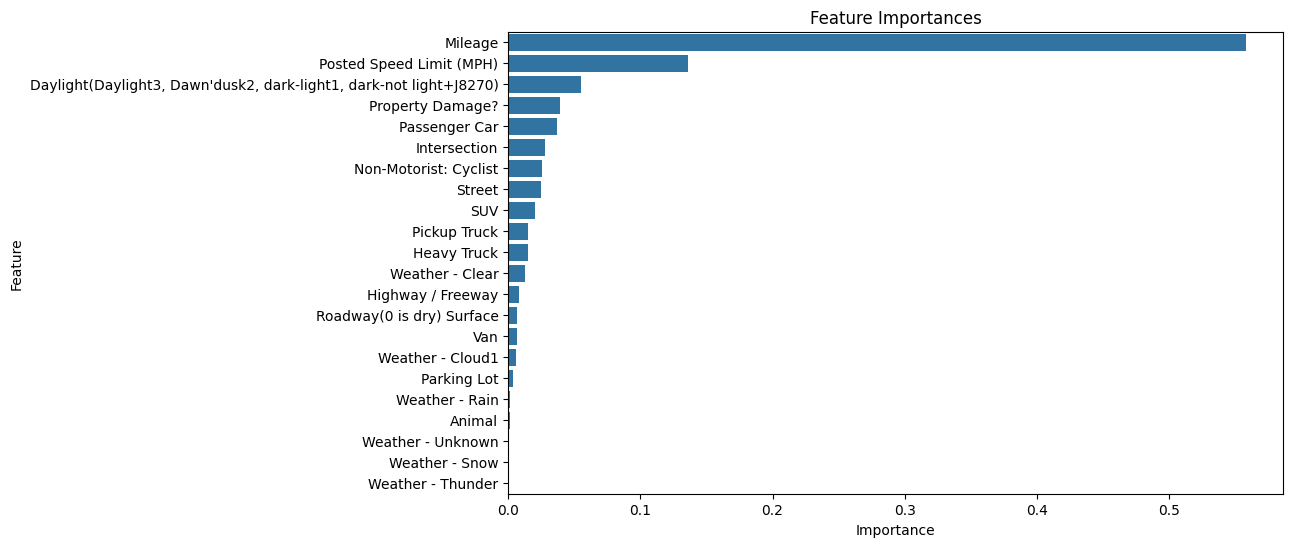

In [341]:
import matplotlib.pyplot as plt

# Assuming original X_train DataFrame is available to get column names
original_X_train = pd.read_csv('Data.csv')[predictors]

# If X_train is a NumPy array, convert it to a DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train_scaled, columns=original_X_train.columns)

# Assuming x_train is a DataFrame with feature names as columns
predictors = X_train.columns

# Get the feature importances from the random forest model
importances = rf_model.feature_importances_

# Create a DataFrame for a nicer display and sorting
feature_importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': importances
})

# Sort the DataFrame by importance (largest to smallest)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Plot using seaborn for a cleaner look
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [342]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train_scaled, y_train)

# Predict using the decision tree model
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")

Decision Tree Model Accuracy: 0.9251


Model Accuracy: 0.9199
Confusion Matrix:
                Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Actual Class 0                312                 16                  1   
Actual Class 1                 12                 30                  0   
Actual Class 2                  2                  0                  8   
Actual Class 3                  0                  0                  0   

                Predicted Class 3  
Actual Class 0                  0  
Actual Class 1                  0  
Actual Class 2                  0  
Actual Class 3                  6  
                                              Feature  Importance
15                              Non-Motorist: Cyclist    0.108617
16                                        Heavy Truck    0.090945
21                                   Property Damage?    0.078625
19                                                Van    0.069578
8                                     Weather - Clear    0.068778
1      

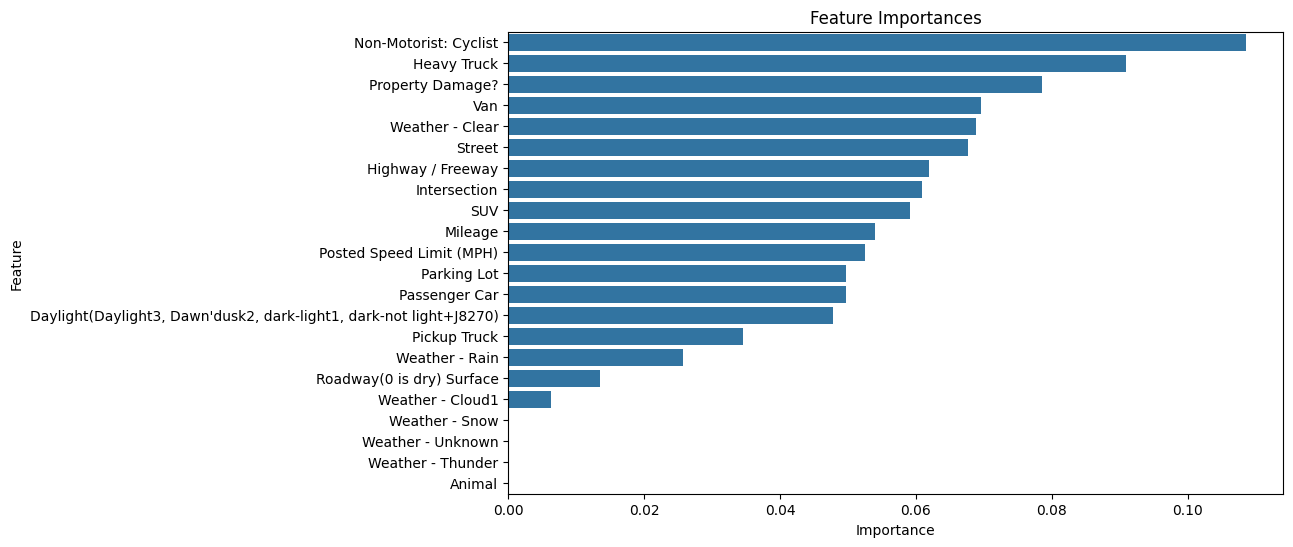

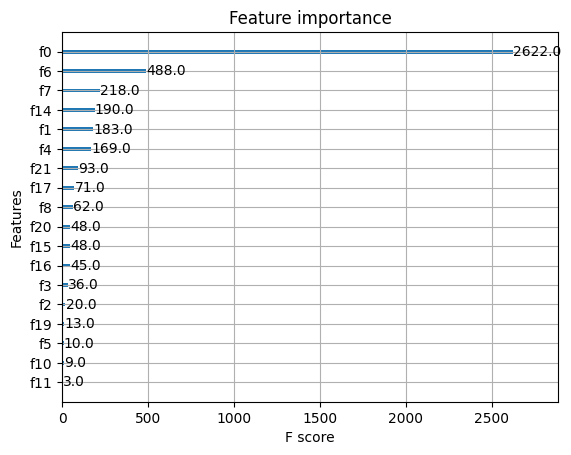

In [343]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Adjust the classes in y to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train_adjusted)
y_pred_xgb = xgb_model.predict(X_test_scaled)
# Evaluate accuracy
accuracy = accuracy_score(y_test_adjusted, y_pred_xgb)
print(f"Model Accuracy: {accuracy:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test_adjusted, y_pred_xgb)

# Create a DataFrame with row and column names
cm_df = pd.DataFrame(cm, 
					 index=["Actual Class 0", "Actual Class 1", "Actual Class 2", "Actual Class 3"],  # Row names
					 columns=["Predicted Class 0", "Predicted Class 1", "Predicted Class 2", "Predicted Class 3"])  # Column names

# Print labeled confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for a nicer display and sorting
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance (largest to smallest)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot using seaborn for a cleaner look
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Alternatively, you can use the built-in plot_importance function
plot_importance(xgb_model)
plt.show()

0    -0.038855
1     0.097147
2     0.187460
3     0.442429
4     0.000000
5     0.000000
6    -0.390177
7     0.000000
8    -0.357396
9     0.000000
10    0.000000
11    0.349829
12    0.114349
13    0.000000
14    0.061087
15   -0.123135
16    0.358081
17    0.389516
18    0.193317
19    0.246543
20    0.143080
21    0.155858
Name: Coefficient, dtype: float64
Lasso Logistic Regression Accuracy: 0.8760


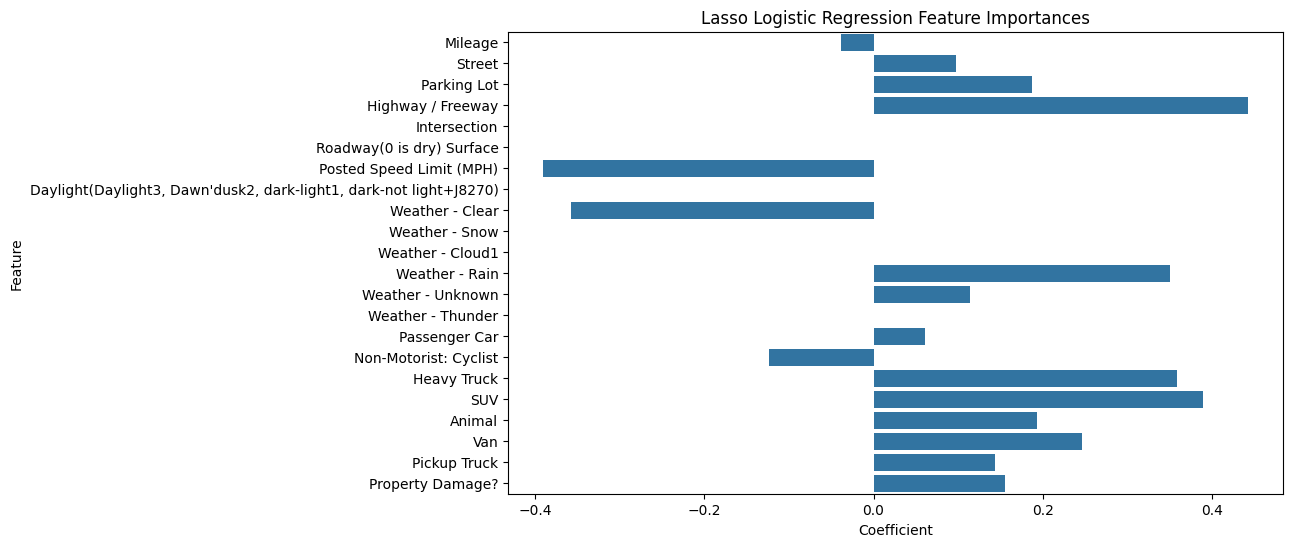

In [344]:
#lasso regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

excludeColumns = ("Model Year","Report Year","Weather - Severe Wind", "Weather - Fog/Smoke", "No Injuries Reported", "Minor", "Moderate", "Serious", "Severity")
predictors = [s for s in df.columns if s not in excludeColumns]
x = df[predictors]
y = df["Severity"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Perform Lasso Logistic Regression
lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
lasso_logistic.fit(X_train_scaled, y_train)

# Get the coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': predictors,
    'Coefficient': lasso_logistic.coef_[0]
})

# Filter out the features with non-zero coefficients
selected_features = lasso_coefficients['Coefficient']
print(selected_features)

# Predict and evaluate the model
y_pred = lasso_logistic.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Lasso Logistic Regression Accuracy: {accuracy:.4f}")

# Optionally, you can plot the coefficients
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients)
plt.title('Lasso Logistic Regression Feature Importances')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

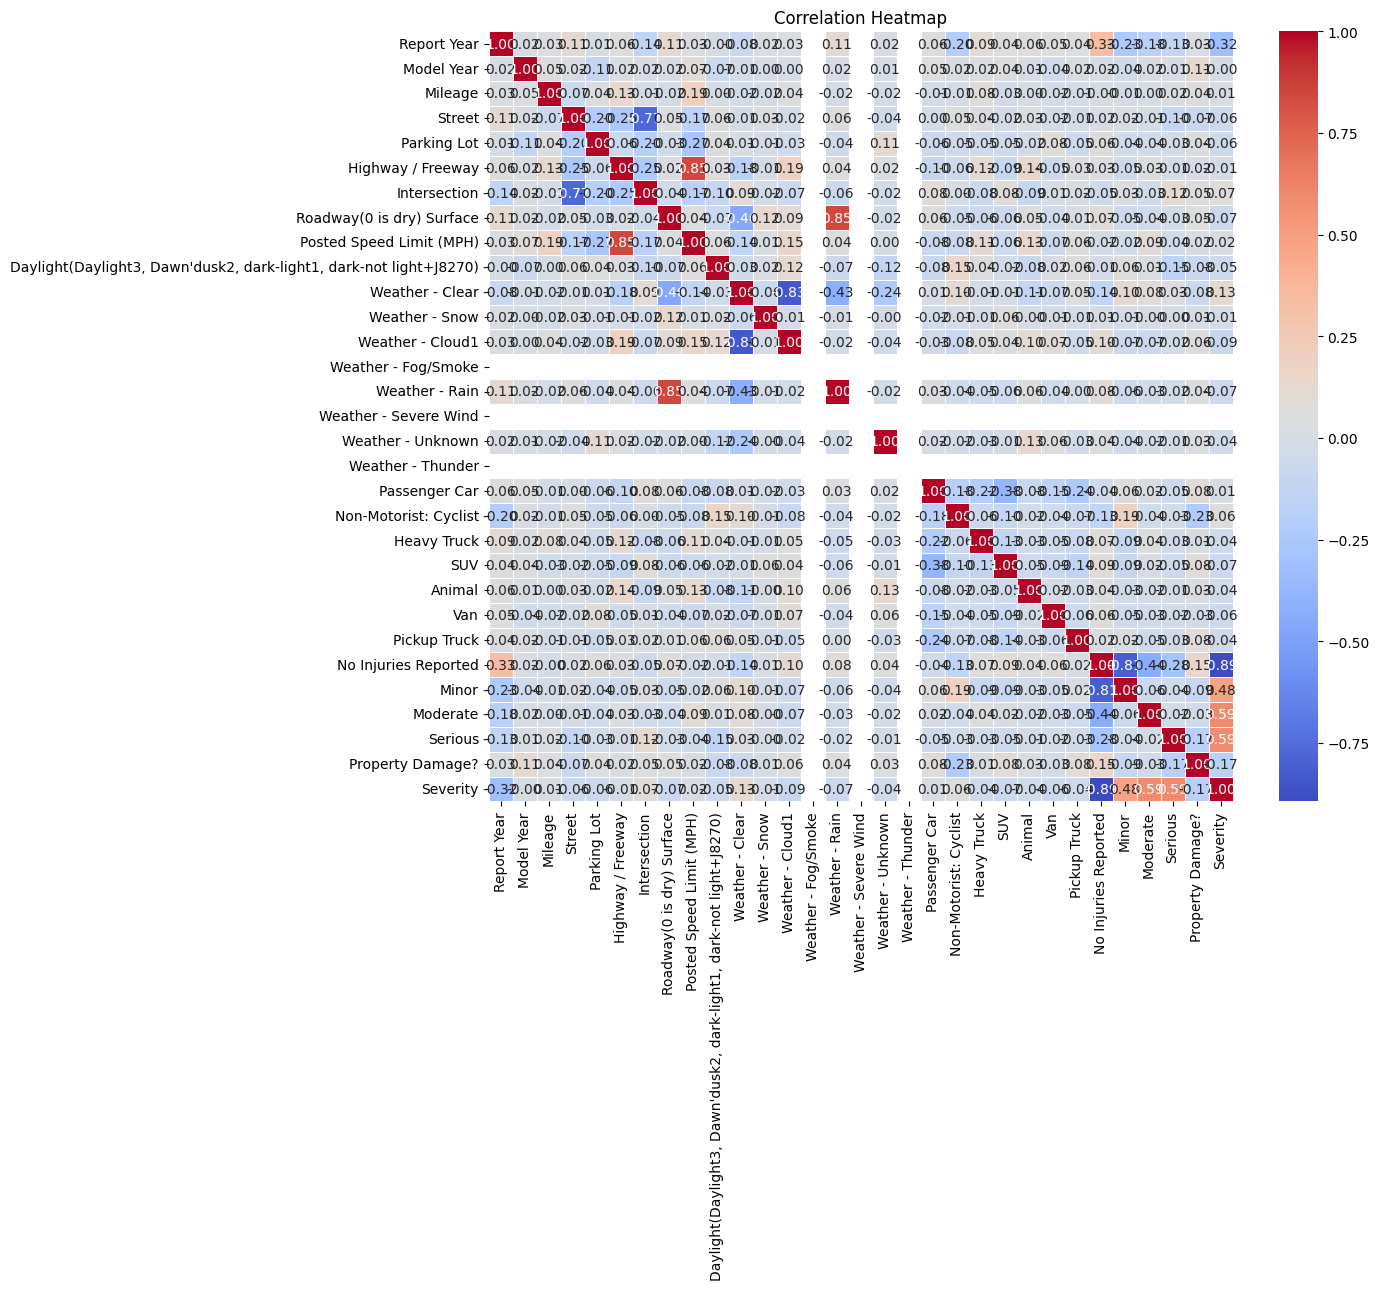

In [345]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [346]:
# bootstraping to make the data set more balanced
# check correlation matrix
# principle components
# take out the mileage componenet
# use other methods (LASSO)
# xgboost

In [347]:
#standardize the dataset
#feature importance for bootstrapping
#try combining xgboost and random forest